# **Summative 1 - Object Detection Patching (YOLO)**

The below is based on https://github.com/Trusted-AI/adversarial-robustness-toolbox/blob/main/notebooks/adversarial_patch/attack_adversarial_patch_pytorch_yolo.ipynb.

Requirements (drag and drop into files on the left hand side):
* A test image with filename "test.jpg"
* For yolov3:
    * https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg
    * https://github.com/patrick013/Object-Detection---Yolov3/blob/master/model/yolov3.weights


To do:
* Test with yolov3 (has caused RAM issues with Colab on previous attemps)
* Create variable to handle CPU/GPU
* Implement evaluation from ART example script
* Save model files to personal Google drive or access via Git

## **Setup**

In [1]:
# pip install
!pip install adversarial-robustness-toolbox -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 10.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.17.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.


In [2]:
# pip install
!pip install ipytest -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00


In [3]:
# pip install
!pip install fiftyone -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.

In [4]:
# pip install
!pip install pytorchyolo -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 275.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 112.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 111.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 112.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 117.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 66.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Thi

In [5]:
# pip install
!pip install yolov5 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.8/677.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6

In [6]:
# Import libraries
from art.estimators.object_detection.pytorch_yolo import PyTorchYolo
from art.attacks.evasion import AdversarialPatchPyTorch

import cv2
import glob
import fiftyone.zoo as foz
from io import BytesIO
import ipytest

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import os
import pandas as pd
from PIL import Image
import shutil
import requests
import torch
from torchvision.transforms import transforms
from tqdm import tqdm

Migrating database to v0.23.2


INFO:fiftyone.migrations.runner:Migrating database to v0.23.2


### **Function Definition**

In [7]:
# Define a function to extract predictions
def extract_predictions(predictions_, conf_thresh):
    # Get the predicted class
    predictions_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(predictions_["labels"])]
    #  print("\npredicted classes:", predictions_class)
    if len(predictions_class) < 1:
        return [], [], []
    # Get the predicted bounding boxes
    predictions_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(predictions_["boxes"])]

    # Get the predicted prediction score
    predictions_score = list(predictions_["scores"])
    # print("predicted score:", predictions_score)

    # Get a list of index with score greater than threshold
    threshold = conf_thresh
    predictions_t = [predictions_score.index(x) for x in predictions_score if x > threshold]
    if len(predictions_t) > 0:
        predictions_t = predictions_t  # [-1] #indices where score over threshold
    else:
        # no predictions esxceeding threshold
        return [], [], []
    # predictions in score order
    predictions_boxes = [predictions_boxes[i] for i in predictions_t]
    predictions_class = [predictions_class[i] for i in predictions_t]
    predictions_scores = [predictions_score[i] for i in predictions_t]
    return predictions_class, predictions_boxes, predictions_scores

# Define a function to plot image with boxes
def plot_image_with_boxes(img, boxes, pred_cls, title):
    text_size = 1
    text_th = 3
    rect_th = 2

    for i in range(len(boxes)):
        cv2.rectangle(img, (int(boxes[i][0][0]), int(boxes[i][0][1])), (int(boxes[i][1][0]), int(boxes[i][1][1])),
                      color=(0, 255, 0), thickness=rect_th)
        # Write the prediction class
        cv2.putText(img, pred_cls[i], (int(boxes[i][0][0]), int(boxes[i][0][1])), cv2.FONT_HERSHEY_SIMPLEX, text_size,
                    (0, 255, 0), thickness=text_th)

    plt.figure()
    plt.axis("off")
    plt.title(title)
    plt.imshow(img.astype(np.uint8), interpolation="nearest")

# Define a function to filter boxes, returning y for use as patch_mask
def filter_boxes(predictions, conf_thresh):
    dictionary = {}

    boxes_list = []
    scores_list = []
    labels_list = []

    for i in range(len(predictions[0]["boxes"])):
        score = predictions[0]["scores"][i]
        if score >= conf_thresh:
            boxes_list.append(predictions[0]["boxes"][i])
            scores_list.append(predictions[0]["scores"][[i]])
            labels_list.append(predictions[0]["labels"][[i]])

    dictionary["boxes"] = np.vstack(boxes_list)
    dictionary["scores"] = np.hstack(scores_list)
    dictionary["labels"] = np.hstack(labels_list)

    y = [dictionary]

    return y

### **Variable Definition**

In [8]:
# Create a variable containing the full list of COCO category names (https://tech.amikelive.com/node-718/what-object-categories-labels-are-in-coco-dataset/)
COCO_INSTANCE_CATEGORY_NAMES = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
        'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
        'teddy bear', 'hair drier', 'toothbrush']

# Create variables to set number of channels and input shape
NUMBER_CHANNELS = 3
INPUT_SHAPE = (NUMBER_CHANNELS, 640, 640)

In [9]:
# Assign a target class
TARGET_CLASS = 'elephant'

### **Model Definition**

In [10]:
# Define model
MODEL = 'yolov5' # OR yolov5

if MODEL == 'yolov3':

    from pytorchyolo.utils.loss import compute_loss
    from pytorchyolo.models import load_model

    class Yolo(torch.nn.Module):
        def __init__(self, model):
            super().__init__()
            self.model = model

        def forward(self, x, targets=None):
            if self.training:
                outputs = self.model(x)
                loss, loss_components = compute_loss(outputs, targets, self.model)
                loss_components_dict = {"loss_total": loss}
                loss_components_dict['loss_box'] = loss_components[0]
                loss_components_dict['loss_obj'] = loss_components[1]
                loss_components_dict['loss_cls'] = loss_components[2]
                return loss_components_dict
            else:
                tmp = self.model(x)
                return tmp

    model_path = "yolov3.cfg"
    weights_path = "yolov3.weights"
    model = load_model(model_path=model_path, weights_path=weights_path)

    model = Yolo(model)

    detector = PyTorchYolo(model=model,
                        device_type='gpu',
                        input_shape=(3, 640, 640),
                        clip_values=(0, 255),
                        attack_losses=("loss_total", "loss_cls",
                                        "loss_box",
                                        "loss_obj"))

elif MODEL == 'yolov5':

    import yolov5
    from yolov5.utils.loss import ComputeLoss

    class Yolo(torch.nn.Module):
        def __init__(self, model):
            super().__init__()
            self.model = model
            self.model.hyp = {'box': 0.05,
                            'obj': 1.0,
                            'cls': 0.5,
                            'anchor_t': 4.0,
                            'cls_pw': 1.0,
                            'obj_pw': 1.0,
                            'fl_gamma': 0.0
                            }
            self.compute_loss = ComputeLoss(self.model.model.model)

        def forward(self, x, targets=None):
            if self.training:
                outputs = self.model.model.model(x)
                loss, loss_items = self.compute_loss(outputs, targets)
                loss_components_dict = {"loss_total": loss}
                loss_components_dict['loss_box'] = loss_items[0]
                loss_components_dict['loss_obj'] = loss_items[1]
                loss_components_dict['loss_cls'] = loss_items[2]
                return loss_components_dict
            else:
                return self.model(x)

    model = yolov5.load('yolov5s.pt')

    model = Yolo(model)

    detector = PyTorchYolo(model=model,
                        device_type='gpu',
                        input_shape=(3, 640, 640),
                        clip_values=(0, 255),
                        attack_losses=("loss_total", "loss_cls",
                                        "loss_box",
                                        "loss_obj"))

In [11]:
# Define transform
transform = transforms.Compose([
        transforms.Resize(INPUT_SHAPE[1], interpolation=transforms.InterpolationMode.BICUBIC),
        transforms.CenterCrop(INPUT_SHAPE[1]),
        transforms.ToTensor()
    ])

### **Attack Settings**

In [12]:
# Define attack settings
rotation_max=0.0
scale_min=0.1
scale_max=0.3
distortion_scale_max=0.0
learning_rate=1.99
max_iter=200
batch_size=16
patch_shape=(3, 640, 640)
patch_location=None
patch_type="circle"
optimizer="pgd"

## **Adversarial Patch Generation**

### **Dataset Retreival**

In [13]:
# Delete folder if it exists
if os.path.isdir('/root/fiftyone'):
  shutil.rmtree('/root/fiftyone')

# Obtain a dataset of images that represent a target class
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="train",
    label_types=["detections", "segmentations"],
    classes=[TARGET_CLASS],
    max_samples=50, ## Maximum of 50 images loaded representing class
)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [5.8s elapsed, 0s remaining, 364.1Mb/s]       


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [5.8s elapsed, 0s remaining, 364.1Mb/s]       


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 50 images


 100% |████████████████████| 50/50 [10.8s elapsed, 0s remaining, 5.1 images/s]      


INFO:eta.core.utils: 100% |████████████████████| 50/50 [10.8s elapsed, 0s remaining, 5.1 images/s]      


Writing annotations for 50 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 50 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |███████████████████| 50/50 [799.1ms elapsed, 0s remaining, 63.2 samples/s]      


INFO:eta.core.utils: 100% |███████████████████| 50/50 [799.1ms elapsed, 0s remaining, 63.2 samples/s]      


Dataset 'coco-2017-train-50' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-50' created


In [14]:
# Import dataset for patch generation
foz_coco_images = []
for filename in glob.glob('/root/fiftyone/coco-2017/train/data/*.jpg'):
    im = Image.open(filename)
    im = transform(im).numpy()
    foz_coco_images.append(im)
foz_coco_images = np.array(foz_coco_images)*255
print(len(foz_coco_images))

50


###  **Dataset Reduction**



Example of Test Driven Development

In [15]:
# Define a function to identify images that result in target class detections only
def target_class_images_and_detections_only(images):

  dets = detector.predict(images)

  successful_predictions = []

  for i in range(len(dets)):
      preds_orig = extract_predictions(dets[i], 0.8)
      if TARGET_CLASS in preds_orig[0]:
        if not any(x != TARGET_CLASS for x in preds_orig[0]):
          successful_predictions.append(i)

  images = [images[i] for i in successful_predictions]
  images = np.array(images)
  dets = detector.predict(images)

  return images, dets

In [16]:
def test_target_class_images_and_detections_only():
    """
    Test case for the target_class_detections_only() function.

    Checks if target_class_detections_only() returns the results of object
    detection on images that the object detection model considers to contain the
    target class only.

    """

    images, dets = target_class_images_and_detections_only(foz_coco_images)

    classes_detected = []

    for i in range(len(dets)):
        preds_orig = extract_predictions(dets[i], 0.8)
        for c in preds_orig[0]:
          classes_detected.append(c)

    if len(set(classes_detected)) < 2:
      classes_detected = str(classes_detected[0])

    assert classes_detected == TARGET_CLASS

In [17]:
ipytest.run('-vv')  # '-vv' for increased verbosity

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.3, pluggy-1.3.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collecting ... collected 1 item

t_a74ed844312c44138450fb6534abc874.py::test_target_class_images_and_detections_only <- <ipython-input-16-94bd9885f481> PASSED [100%]

========================================= warnings summary =========================================
../usr/local/lib/python3.10/dist-packages/_pytest/config/__init__.py:1204
  /usr/local/lib/python3.10/dist-packages/_pytest/config/__init__.py:1204: PytestAssertRewriteWarning: Module already imported so cannot be rewritten: anyio
    self._mark_plugins_for_rewrite(hook)

-- Docs: https://docs.pytest.org/en/stable/how-to/capture-warnings.html
=================================== 1 passed, 1 warning in 6.96s ===================================


<ExitCode.OK: 0>

In [18]:
foz_coco_subset, dets = target_class_images_and_detections_only(foz_coco_images)

In [19]:
print(len(foz_coco_subset))
print(len(dets))

19
19


### **Generation**

In [20]:
# Run filter_boxes
y = [filter_boxes([t], 0.8)[0] for t in dets] ## Use dets from target_class_images_and_detections_only function call

In [21]:
# Run AdversarialPatchPyTorch.generate on dataset (https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html)
ap = AdversarialPatchPyTorch(estimator=detector, rotation_max=rotation_max,
                      scale_min=scale_min, scale_max=scale_max, optimizer=optimizer, distortion_scale_max=distortion_scale_max,
                      learning_rate=learning_rate, max_iter=1000, batch_size=batch_size,
                      patch_shape=(3, 200, 200), patch_type=patch_type, verbose=True, targeted=True)

patch, patch_mask = ap.generate(x=foz_coco_subset, y=[y[-1] for i in range(len(foz_coco_subset))])

# Output patch
plt.axis("off")
plt.imshow(((patch) * patch_mask).transpose(1,2,0).astype(np.uint8))
plt.show()

Adversarial Patch PyTorch:   0%|          | 0/1000 [00:00<?, ?it/s]

## **Benign Image Object Detection**

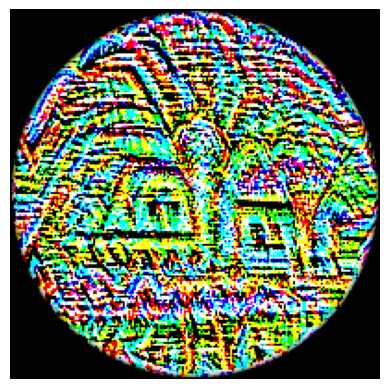

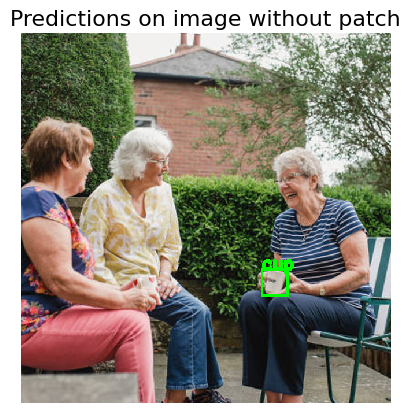

In [22]:
# Faciliate output of multiple images
%matplotlib inline

# Create an empty list
test_images = []

# Load images and reformat for detector
for i in ["test.jpg"]:
    im = Image.open(i)
    im = transform(im).numpy()
    test_images.append(im)
test_images = np.array(test_images)*255

# Run detector and output images with detection boxes
dets = detector.predict(test_images)
for i in range(len(dets)):
    preds_orig = extract_predictions(dets[i], 0.8)
    plot_image_with_boxes(img=test_images[i].transpose(1,2,0).copy(), boxes=preds_orig[1], pred_cls=preds_orig[0], title="Predictions on image without patch")

## **Patched Image Object Detection**

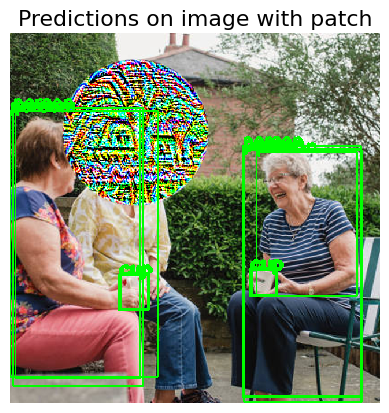

In [23]:
# Faciliate output of multiple images
%matplotlib inline

patched_test = ap.apply_patch(test_images, scale=0.4)
dets = detector.predict(patched_test)
for i in range(len(dets)):
    preds_orig = extract_predictions(dets[i], 0.5)
    plot_image_with_boxes(img=patched_test[i].transpose(1,2,0).copy(), boxes=preds_orig[1], pred_cls=preds_orig[0],
                           title="Predictions on image with patch")

## **Example Usage**

In [24]:
# Retreive image set utilized in ART example script
urls = ['http://images.cocodataset.org/val2017/000000039769.jpg',
'http://images.cocodataset.org/val2017/000000397133.jpg',
'http://images.cocodataset.org/val2017/000000037777.jpg',
'http://images.cocodataset.org/val2017/000000454661.jpg',
'http://images.cocodataset.org/val2017/000000094852.jpg']
coco_test_set = []
for url in urls:
    im = Image.open(requests.get(url, stream=True).raw)
    im = transform(im).numpy()
    coco_test_set.append(im)
coco_test_set = np.array(coco_test_set)*255

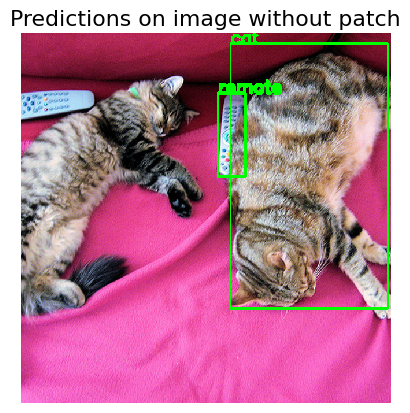

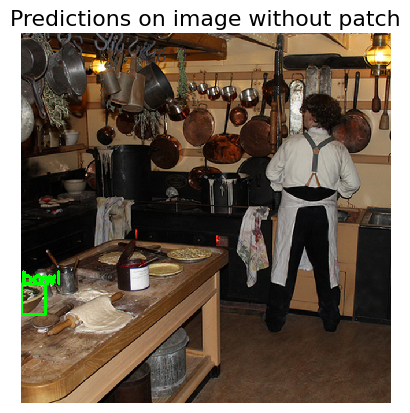

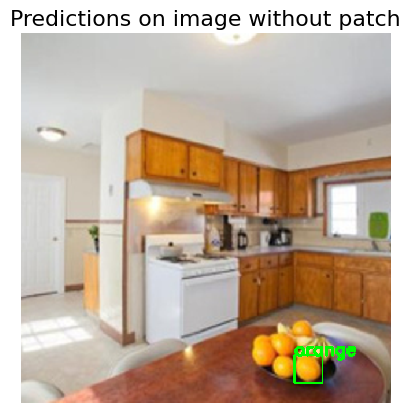

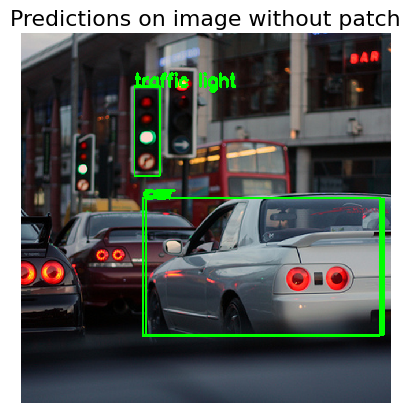

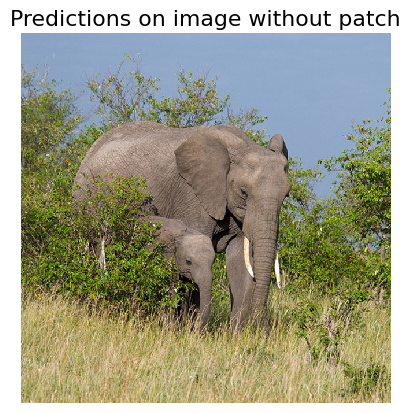

In [25]:
# Faciliate output of multiple images
%matplotlib inline

dets = detector.predict(coco_test_set)
for i in range(len(dets)):
    preds_orig = extract_predictions(dets[i], 0.8)
    plot_image_with_boxes(img=coco_test_set[i].transpose(1,2,0).copy(), boxes=preds_orig[1], pred_cls=preds_orig[0], title="Predictions on image without patch")

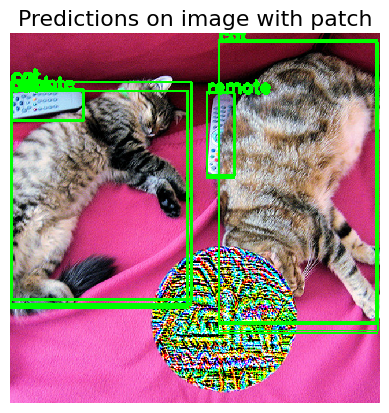

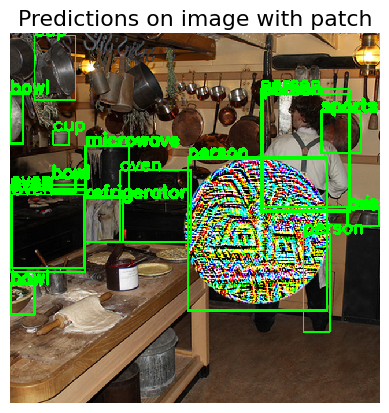

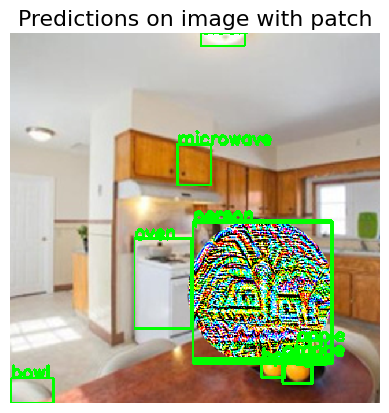

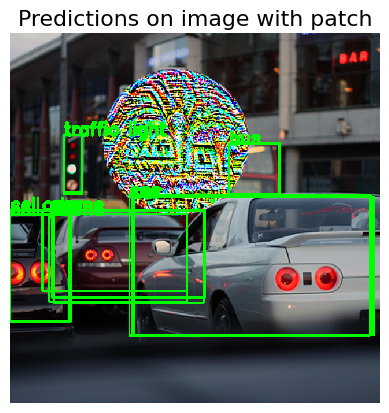

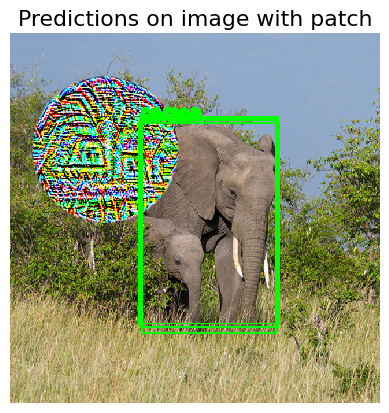

In [26]:
# Faciliate output of multiple images
%matplotlib inline

patched_images = ap.apply_patch(coco_test_set, scale=0.4)
dets = detector.predict(patched_images)
for i in range(len(dets)):
    preds_orig = extract_predictions(dets[i], 0.5)
    plot_image_with_boxes(img=patched_images[i].transpose(1,2,0).copy(), boxes=preds_orig[1], pred_cls=preds_orig[0],
                           title="Predictions on image with patch")